## 1. Fetch live data

In [5]:
import requests

url = "https://api.coingecko.com/api/v3/coins/markets"

params = {
    'vs_currency': 'usd',
    'order': 'market_cap_desc',
    'per_page': 50,  # Number of cryptocurrencies to fetch
    'page': 1
}

# Fetch the data
response = requests.get(url, params=params)
data = response.json()

# Display the first few entries
data[:5]


[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://coin-images.coingecko.com/coins/images/1/large/bitcoin.png?1696501400',
  'current_price': 98512,
  'market_cap': 1949658418024,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 2069265093600,
  'total_volume': 79149934516,
  'high_24h': 99645,
  'low_24h': 97394,
  'price_change_24h': -524.6612625313865,
  'price_change_percentage_24h': -0.52976,
  'market_cap_change_24h': -10096300544.773682,
  'market_cap_change_percentage_24h': -0.51518,
  'circulating_supply': 19786168.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 99645,
  'ath_change_percentage': -1.10697,
  'ath_date': '2024-11-22T19:35:49.770Z',
  'atl': 67.81,
  'atl_change_percentage': 145223.40745,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2024-11-23T05:34:04.520Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://coin-images.coingecko.com/coins/images/2

Convert data to a Pandas DataFrame

In [6]:
import pandas as pd

df = pd.DataFrame(data)

df=df[['symbol', 'name','current_price','market_cap', 'market_cap_rank', 'total_volume', 'high_24h', 'low_24h', 'price_change_24h', 'price_change_percentage_24h', 'market_cap_change_24h', 'market_cap_change_percentage_24h', ]]


Display the dataframe

In [7]:
df.head()

,symbol,name,current_price,market_cap,market_cap_rank,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h
0,btc,Bitcoin,98512.000,1949658418024,1,79149934516,99645.000,97394.000000,-524.661263,-0.52976,-1.009630e+10,-0.51518
1,eth,Ethereum,3338.760,402654430287,2,38322264918,3392.770,3276.900000,-49.082448,-1.44878,-5.274251e+09,-1.29293
2,usdt,Tether,1.001,132199175633,3,146683400854,1.003,0.997979,-0.001096,-0.10945,1.287803e+09,0.98372
3,sol,Solana,259.470,123434187666,4,9345632677,262.960,253.040000,-3.077097,-1.17203,-1.103514e+09,-0.88609
4,bnb,BNB,646.520,94393738027,5,2291042733,649.090,616.320000,11.240000,1.76942,1.691902e+09,1.82510


Format the DataFrame

In [8]:
# Define the exchange rate (1 USD = 82.5 INR)
exchange_rate = 82.5

# Function to format the DataFrame
def format_dataframe_with_usd_inr(df, rate):
    # Duplicate USD columns and add INR columns next to them
    df["current_price(INR)"] = df["current_price"].apply(lambda x: f"{x * rate:,.2f}")
    df["market_capitalization(INR)"] = df["market_cap"].apply(lambda x: f"{x * rate:,.0f}")
    df["24_hour_trading_volume(INR)"] = df["total_volume"].apply(lambda x: f"{x * rate:,.0f}")
    df["high_24h(INR)"] = df["high_24h"].apply(lambda x: f"{x * rate:,.2f}")
    df["low_24h(INR)"] = df["low_24h"].apply(lambda x: f"{x * rate:,.2f}")
    df["price_change_24h(INR)"] = df["price_change_24h"].apply(lambda x: f"{x * rate:,.2f}")

    # Format existing USD columns with (USD) in their labels
    df.rename(
        columns={
            "current_price": "current_price(USD)",
            "market_cap": "market_capitalization(USD)",
            "total_volume": "24_hour_trading_volume(USD)",
            "high_24h": "high_24h(USD)",
            "low_24h": "low_24h(USD)",
            "price_change_24h": "price_change_24h(USD)",
        },
        inplace=True,
    )

    # Keep percentage columns as they are
    df["price_change_percentage_24h"] = df["price_change_percentage_24h"].apply(lambda x: f"{x:.2f}%")
    df["market_cap_change_percentage_24h"] = df["market_cap_change_percentage_24h"].apply(lambda x: f"{x:.2f}%")

    return df

# Apply the formatting
formatted_df = format_dataframe_with_usd_inr(df, exchange_rate)




Display the formatted DataFrame


In [9]:
formatted_df.head()

,symbol,name,current_price(USD),market_capitalization(USD),market_cap_rank,24_hour_trading_volume(USD),high_24h(USD),low_24h(USD),price_change_24h(USD),price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,current_price(INR),market_capitalization(INR),24_hour_trading_volume(INR),high_24h(INR),low_24h(INR),price_change_24h(INR)
0,btc,Bitcoin,98512.000,1949658418024,1,79149934516,99645.000,97394.000000,-524.661263,-0.53%,-1.009630e+10,-0.52%,"8,127,240.00","160,846,819,486,980","6,529,869,597,570","8,220,712.50","8,035,005.00","-43,284.55"
1,eth,Ethereum,3338.760,402654430287,2,38322264918,3392.770,3276.900000,-49.082448,-1.45%,-5.274251e+09,-1.29%,"275,447.70","33,218,990,498,678","3,161,586,855,735","279,903.53","270,344.25","-4,049.30"
2,usdt,Tether,1.001,132199175633,3,146683400854,1.003,0.997979,-0.001096,-0.11%,1.287803e+09,0.98%,82.58,"10,906,431,989,722","12,101,380,570,455",82.75,82.33,-0.09
3,sol,Solana,259.470,123434187666,4,9345632677,262.960,253.040000,-3.077097,-1.17%,-1.103514e+09,-0.89%,"21,406.28","10,183,320,482,445","771,014,695,852","21,694.20","20,875.80",-253.86
4,bnb,BNB,646.520,94393738027,5,2291042733,649.090,616.320000,11.240000,1.77%,1.691902e+09,1.83%,"53,337.90","7,787,483,387,228","189,011,025,472","53,549.93","50,846.40",927.30


In [10]:
df=formatted_df

## 2. Data Analysis

**•	Identifying the top 5 cryptocurrencies by market cap.**

In [11]:

# Sort the DataFrame by market_cap (USD) in descending order and select the top 5
top_5_cryptos = df.sort_values(by="market_capitalization(USD)", ascending=False).head(5)

# Display the top 5 cryptocurrencies
print(top_5_cryptos.name)


0     Bitcoin
1    Ethereum
2      Tether
3      Solana
4         BNB
Name: name, dtype: object


**•	Calculating the average price of the top 50 cryptocurrencies.**

In [12]:
# Sort the DataFrame by market_cap (USD) in descending order and select the top 50
top_50_cryptos = df.sort_values(by="market_capitalization(USD)", ascending=False).head(50)

# Calculate the average price (USD)
average_price = top_50_cryptos["current_price(USD)"].mean()

# Display the average price
print(f"Average price of the top 50 cryptocurrencies: ${average_price:.2f}")


Average price of the top 50 cryptocurrencies: $4329.15


**•	Analyzing the highest and lowest 24-hour percentage price change among the top 50.**

In [13]:
# Sort the DataFrame by market_cap (USD) in descending order and select the top 50
top_50_cryptos = df.sort_values(by="market_capitalization(USD)", ascending=False).head(50)

# Find the highest and lowest 24-hour percentage price change
highest_change = top_50_cryptos["price_change_percentage_24h"].max()
lowest_change = top_50_cryptos["price_change_percentage_24h"].min()

# Display the results
print(f"Highest 24-hour percentage price change: {highest_change}%")
print(f"Lowest 24-hour percentage price change: {lowest_change}%")


Highest 24-hour percentage price change: 9.99%%
Lowest 24-hour percentage price change: -0.07%%


### Data Visualisation



**Market Cap Distribution (Pie Chart)**

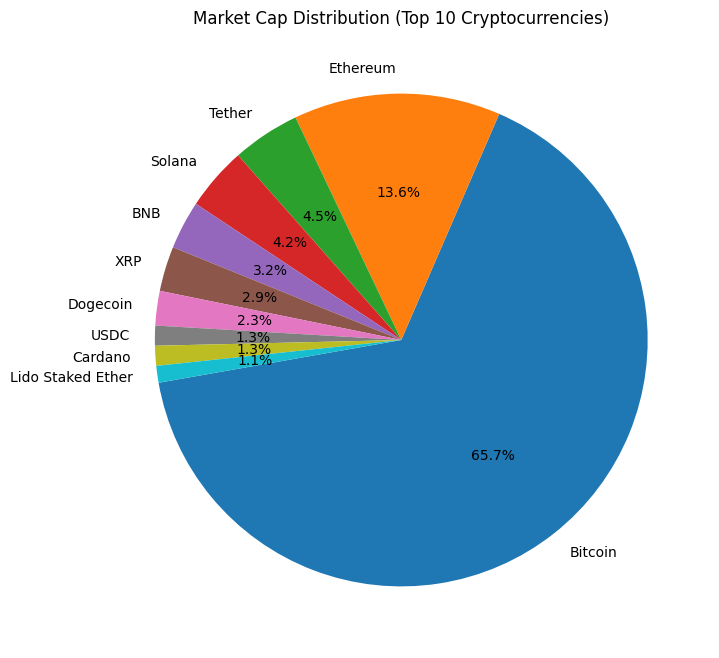

In [14]:
import matplotlib.pyplot as plt

# Top 10 cryptocurrencies by market cap
top_10 = df.sort_values("market_capitalization(USD)", ascending=False).head(10)

# Pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_10["market_capitalization(USD)"], labels=top_10["name"], autopct='%1.1f%%', startangle=190)
plt.title("Market Cap Distribution (Top 10 Cryptocurrencies)")
plt.show()


**Price Trends (Bar Chart)**

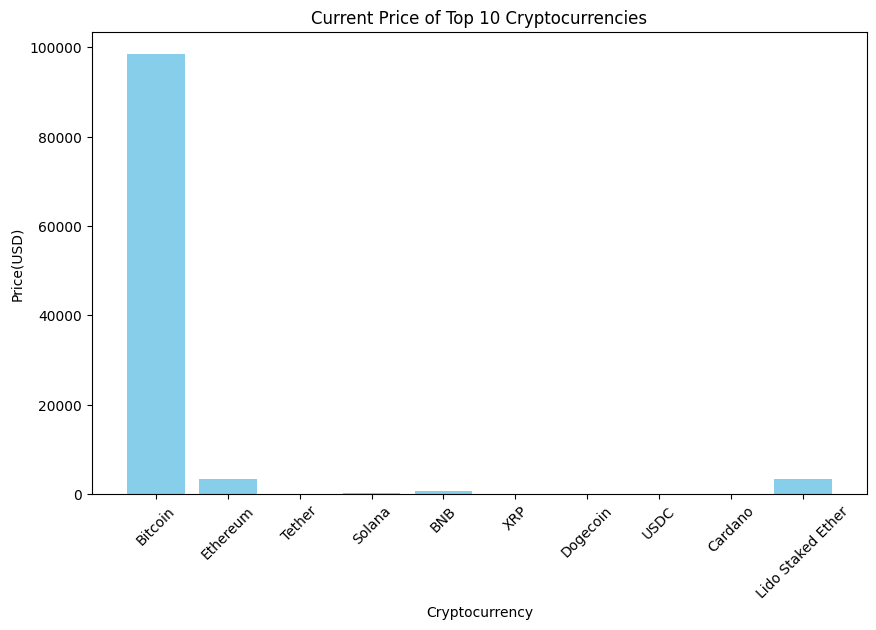

In [15]:
# Bar chart for price trends
plt.figure(figsize=(10, 6))
plt.bar(top_10["name"], top_10["current_price(USD)"], color="skyblue")
plt.xlabel("Cryptocurrency")
plt.ylabel("Price(USD)")
plt.title("Current Price of Top 10 Cryptocurrencies")
plt.xticks(rotation=45)
plt.show()


**Trading Volume Analysis**

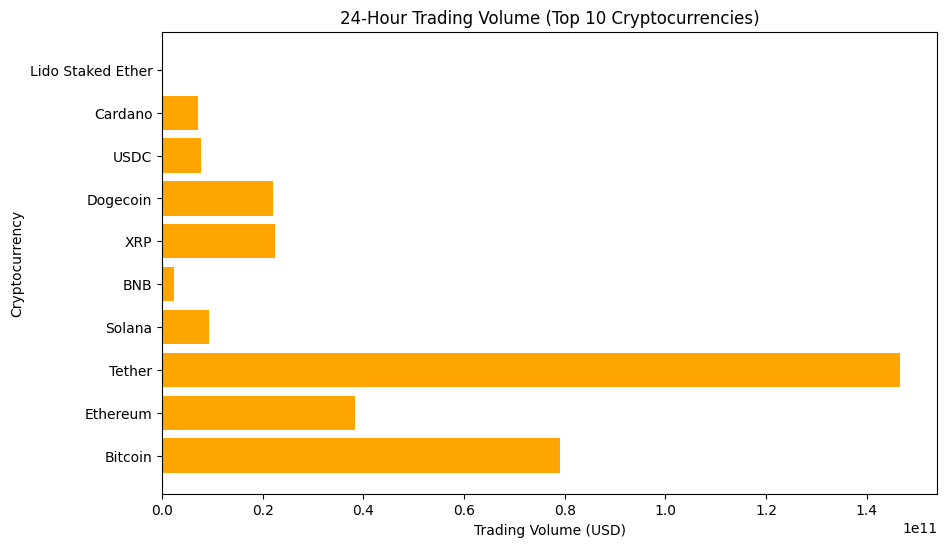

In [16]:
# Horizontal bar chart for trading volume
plt.figure(figsize=(10, 6))
plt.barh(top_10["name"], top_10["24_hour_trading_volume(USD)"], color="orange")
plt.xlabel("Trading Volume (USD)")
plt.ylabel("Cryptocurrency")
plt.title("24-Hour Trading Volume (Top 10 Cryptocurrencies)")
plt.show()


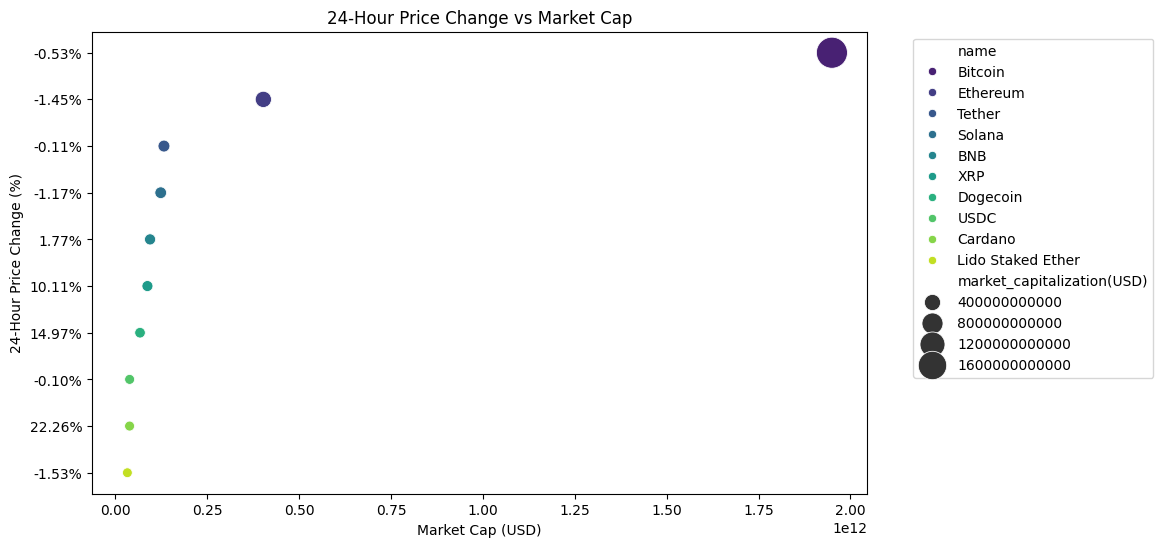

In [17]:
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=top_10,
    x="market_capitalization(USD)",
    y="price_change_percentage_24h",
    hue="name",
    size="market_capitalization(USD)",
    sizes=(50, 500),
    palette="viridis"
)
plt.xlabel("Market Cap (USD)")
plt.ylabel("24-Hour Price Change (%)")
plt.title("24-Hour Price Change vs Market Cap")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**High vs.Low 24-Hour Prices**

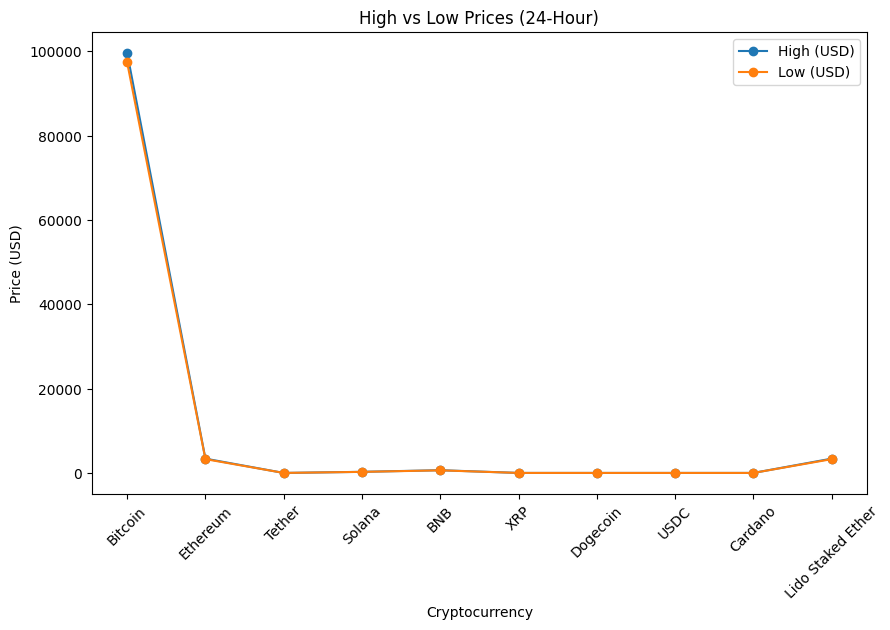

In [18]:
# Line chart for high vs low prices
plt.figure(figsize=(10, 6))
plt.plot(top_10["name"], top_10["high_24h(USD)"], marker='o', label="High (USD)")
plt.plot(top_10["name"], top_10["low_24h(USD)"], marker='o', label="Low (USD)")
plt.xlabel("Cryptocurrency")
plt.ylabel("Price (USD)")
plt.title("High vs Low Prices (24-Hour)")
plt.legend()
plt.xticks(rotation=45)
plt.show()
